# **Importing required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data loading**

In [ ]:
walmart_data = pd.read_csv('./walmart_analysis.csv')

# **Data overview**

In [4]:
walmart_data.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469


In [5]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   int64  
 6   unit_price              5000 non-null   float64
 7   transaction_date        5000 non-null   object 
 8   store_id                5000 non-null   int64  
 9   store_location          5000 non-null   object 
 10  inventory_level         5000 non-null   int64  
 11  reorder_point           5000 non-null   int64  
 12  reorder_quantity        5000 non-null   int64  
 13  supplier_id             5000 non-null   int64  
 14  supplier_lead_time      5000 non-null   

In [6]:
walmart_data.isnull().sum()

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64

In [7]:
walmart_data.duplicated().sum()

np.int64(0)

# **Cleaning up the data**

### *~ Changing column type*

In [8]:
walmart_data['transaction_date'] = pd.to_datetime(walmart_data['transaction_date'])

### *~ Filling 'None' in empty cells in 'promotion_type' column*

In [9]:
walmart_data['promotion_type'] = walmart_data['promotion_type'].fillna('None')

# **Adding additional columns**

### *~ Revenue column*

In [10]:
walmart_data['revenue'] = walmart_data['quantity_sold'] * walmart_data['unit_price']

### *~ Hour column*

In [11]:
walmart_data['hour'] = walmart_data['transaction_date'].dt.hour

### *~ Day column*

In [12]:
walmart_data['day'] = walmart_data['transaction_date'].dt.day

### *~ Month column*

In [13]:
walmart_data['month'] = walmart_data['transaction_date'].dt.month

### *~ Age_group column*

In [14]:
# Define bins and labels
bins = [18, 24, 34, 44, 54, 64, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Add Age Group column
walmart_data['age_group'] = pd.cut(walmart_data['customer_age'], bins=bins, labels=labels, right=True)

### *~ Income_group column*

In [15]:
# Define bins and labels
bins = [20000, 40000, 60000, 80000, 100000, 110000] 
labels = ['20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']

# Add Income Group column
walmart_data['income_group'] = pd.cut(walmart_data['customer_income'], bins=bins, labels=labels, right=True)

### *~ forecast_bias column*

In [16]:
walmart_data['forecast_bias'] = walmart_data['forecasted_demand'] - walmart_data['actual_demand']

# **Sales Performance Analysis**

### **1. Top selling products and categories : Identify the most popular products/categories based on quantity sold and revenue**

In [17]:
product_sales_table = walmart_data.groupby('product_name')[['quantity_sold', 'revenue']].sum()
product_sales_table

,quantity_sold,revenue
product_name,,
Camera,1873,1895104.13
Fridge,1967,1938012.69
Headphones,1816,1846334.45
Laptop,1685,1709159.24
Smartphone,1876,1931310.04
TV,1926,2049493.86
Tablet,1964,1996253.02
Washing Machine,1807,1897934.02


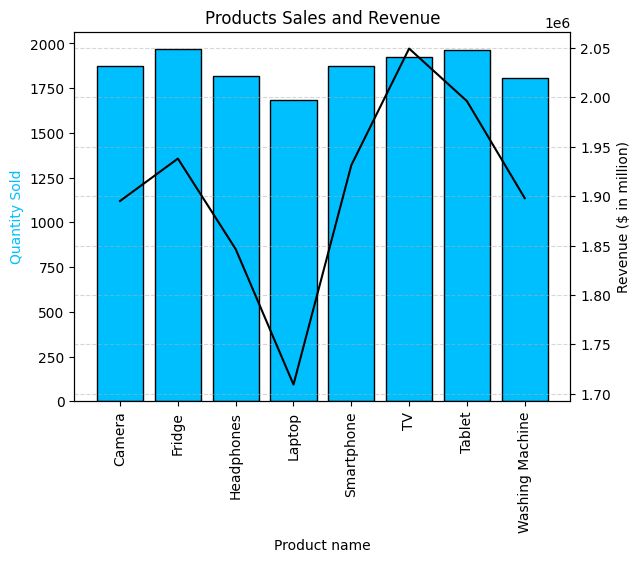

In [18]:
# Group the data by product name and calculate the total quantity sold
product_group = walmart_data.groupby('product_name')
quantity_sold = product_group['quantity_sold'].sum()

# Extract product names for plotting and revenue
products = [product_name for product_name, df in product_group]
revenues = walmart_data.groupby('product_name')['revenue'].sum()

# Create a bar chart and line plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_sold, color='deepskyblue', edgecolor='black')
ax2.plot(products, revenues, color='black')

# Set labels, title, and formatting
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Sold', color='deepskyblue')
ax2.set_ylabel('Revenue ($ in million)', color='black')

ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical')
plt.title('Products Sales and Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

### **2. Seasonality & trends: Analyze how sales fluctuate over time (monthly, daily, and hourly trends)**

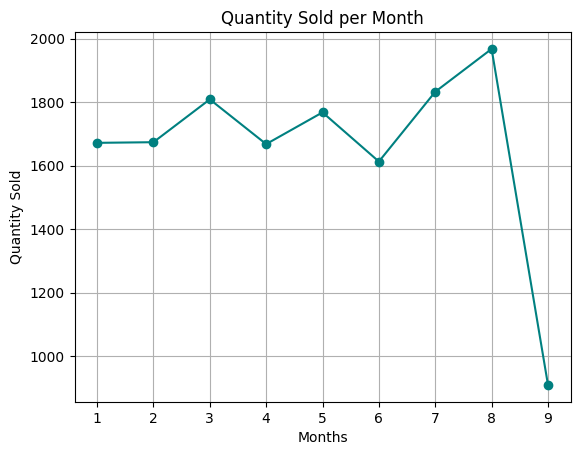

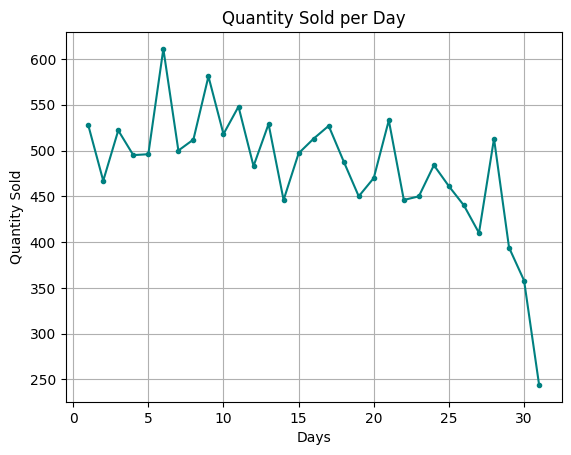

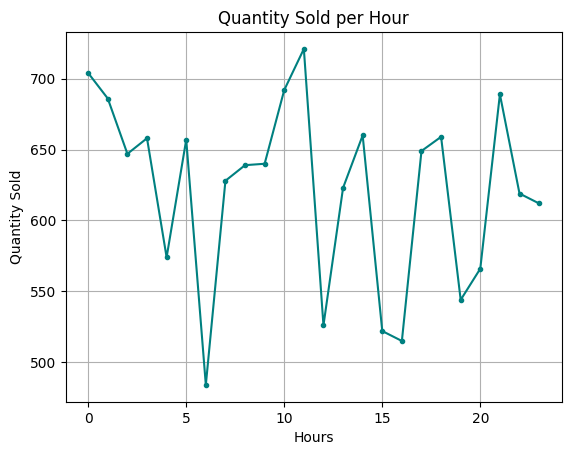

In [19]:
# BY MONTHS
# Extract months
months = sorted(walmart_data['month'].unique())  # Ensure months are in order

# Count quantity sold per month
quantity_sum = walmart_data.groupby('month')['quantity_sold'].sum() 

# Plot
plt.plot(months, quantity_sum, marker='o', linestyle='-', color='teal')

# Formatting
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Month')
plt.grid(True)

# Show the plot
plt.show()



# BY DAYS
# Extract days
days = sorted(walmart_data['day'].unique())  # Ensure days are in order

# Count quantity sold per month
quantity_sum = walmart_data.groupby('day')['quantity_sold'].sum() 

# Plot
plt.plot(days, quantity_sum, marker='.', linestyle='solid', color='teal')

# Formatting
plt.xticks()
plt.xlabel('Days')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Day')
plt.grid(True)

# Show the plot
plt.show()



# BY HOURS
# Extract days
hours = sorted(walmart_data['hour'].unique())  # Ensure hours are in order

# Count quantity sold per month
quantity_sum = walmart_data.groupby('hour')['quantity_sold'].sum() 

# Plot
plt.plot(hours, quantity_sum, marker='.', linestyle='solid', color='teal')

# Formatting
plt.xticks()
plt.xlabel('Hours')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Hour')
plt.grid(True)

# Show the plot
plt.show()

### **3. Store performance: Compare sales performance across different stores and store locations.**

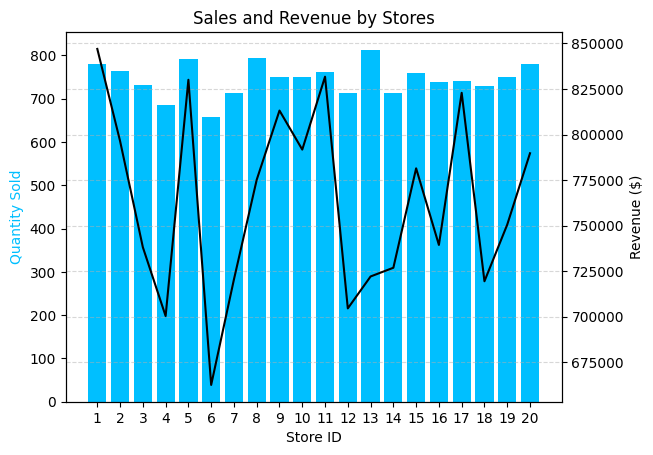

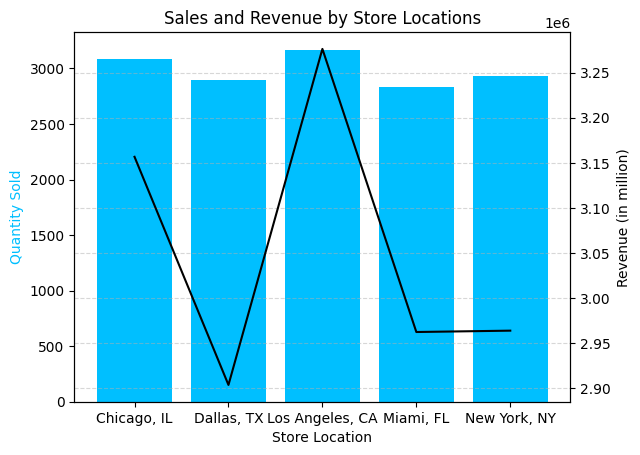

In [20]:
# BY STORE ID
# Group the data by store ids and calculate the total quantity sold
store_group = walmart_data.groupby('store_id')
quantity_sold = store_group['quantity_sold'].sum()

# Extract store ids for plotting and revenue
stores = [store_id for store_id, df in store_group]
revenues = walmart_data.groupby('store_id')['revenue'].sum()

# Create a bar chart and line plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(stores, quantity_sold, color='deepskyblue')
ax2.plot(stores, revenues, color='black')

# Set labels, title, and formatting
ax1.set_xticks(stores)
ax1.set_xlabel('Store ID')

ax1.set_ylabel('Quantity Sold', color='deepskyblue')
ax2.set_ylabel('Revenue ($)', color='black')
ax1.set_xticklabels(stores)
plt.xticks(stores)
plt.title('Sales and Revenue by Stores')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()


#BY STORE LOCATION
# Group the data by store locations and calculate the total quantity sold
store_location_group = walmart_data.groupby('store_location')
quantity_sold = store_location_group['quantity_sold'].sum()

# Extract stores locations for plotting and revenue
stores = [store_location for store_location, df in store_location_group]
revenues = walmart_data.groupby('store_location')['revenue'].sum()

# Create a bar chart and line plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(stores, quantity_sold, color='deepskyblue')
ax2.plot(stores, revenues, color='black')

# Set labels, title, and formatting
ax1.set_xticks(stores)
ax1.set_xlabel('Store Location')

ax1.set_ylabel('Quantity Sold', color='deepskyblue')
ax2.set_ylabel('Revenue (in million)', color='black')
ax1.set_xticklabels(stores)
plt.title('Sales and Revenue by Store Locations')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

### **4. Distribution of promotions: Types of promotions applied to sales.**

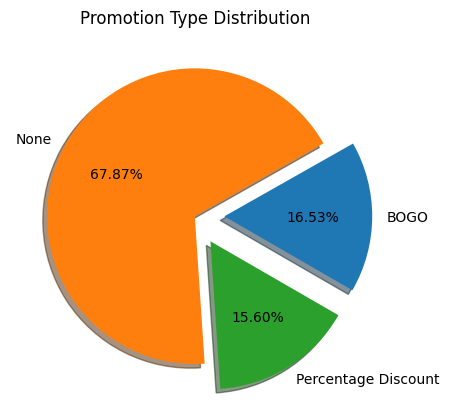

In [21]:
# Group the data by promotion type and calculate the total quantity sold
promotions = walmart_data.groupby('promotion_type')['quantity_sold'].sum() 

# Plot
explodes = [0.2, 0, 0.2]
plt.pie(promotions, labels=promotions.index, autopct='%.2f%%', startangle=330, explode=explodes, shadow=True)
plt.title('Promotion Type Distribution')
plt.show()

# **Customer Behavior Analysis**

### **1. Customer demographics & spending habits: Segment customers by age, gender, income, and loyalty level to see how different groups shop.**

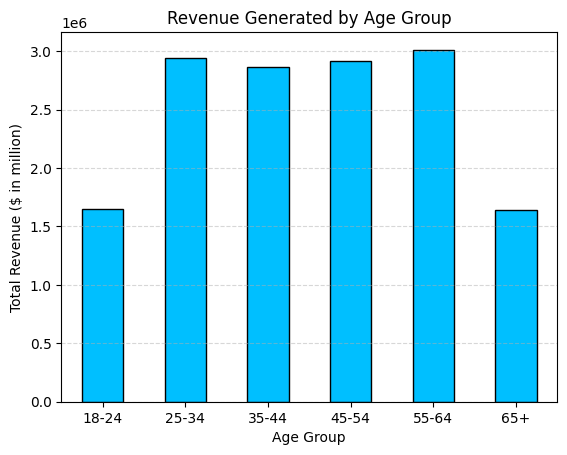

In [22]:
# BY AGE GROUP

# Group by Age Group and calculate total revenue
revenue_by_age_group = walmart_data.groupby('age_group', observed=False)['revenue'].sum()

# Plotting
revenue_by_age_group.plot(kind='bar', color='deepskyblue', edgecolor='black')

plt.title('Revenue Generated by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation='horizontal')
plt.ylabel('Total Revenue ($ in million)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

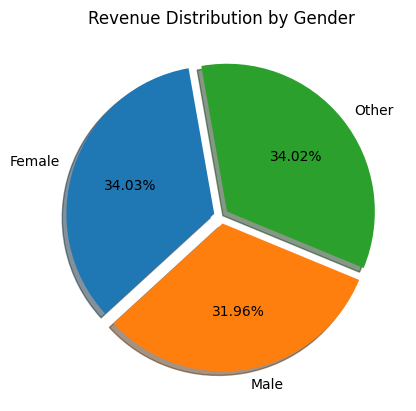

In [23]:
# BY GENDER

# Group by gender and calculate total revenue
customer_genders = walmart_data.groupby('customer_gender')['revenue'].sum() 

# Plot
explodes=[0.05, 0.05, 0.05]
plt.pie(customer_genders, labels=customer_genders.index, autopct='%.2f%%', startangle=100, explode=explodes, shadow=True)
plt.title('Revenue Distribution by Gender')
plt.show()

In [24]:
# BY INCOME LEVELS

walmart_data.groupby('income_group', observed=False)['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
income_group,,,,,,,,
20k-40k,1015.0,3082.914128,2376.372865,78.11,1204.1550,2371.160,4620.750,9987.85
40k-60k,964.0,2978.415021,2302.013103,50.10,1190.8625,2371.725,4268.465,9924.85
60k-80k,1050.0,3011.186781,2360.419154,50.26,1092.8600,2409.380,4437.510,9982.60
80k-100k,954.0,3115.738648,2408.276429,74.95,1178.5050,2480.395,4546.285,9936.35
100k+,489.0,3131.315951,2389.458139,111.66,1184.4900,2303.200,4896.690,9926.20


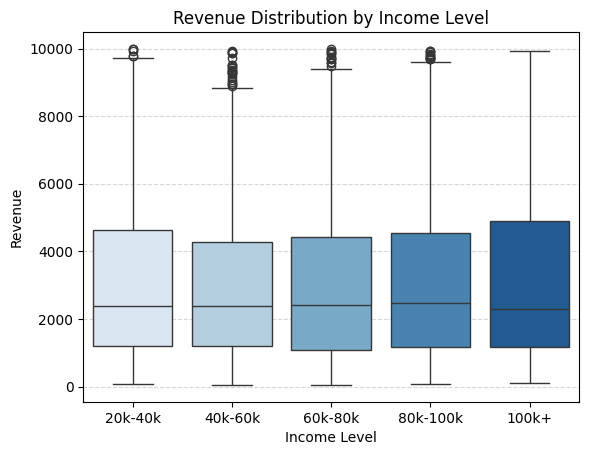

In [25]:
# Plotting
sns.boxplot(x='income_group', y='revenue', data=walmart_data, hue='income_group', palette='Blues', legend=False)

plt.title('Revenue Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

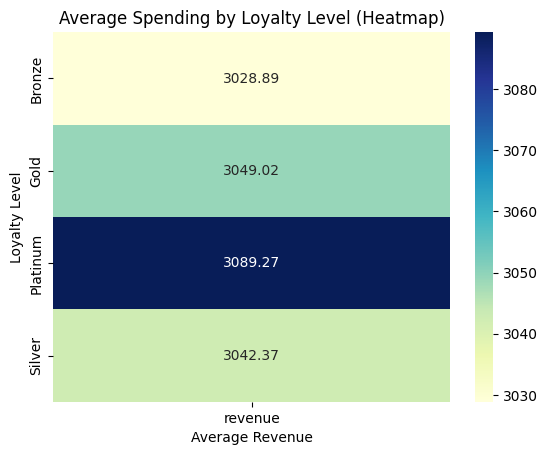

In [26]:
# BY LOYALTY LEVEL

# Calculate Average Spending by Loyalty Level
avg_spending = walmart_data.groupby('customer_loyalty_level')['revenue'].mean().reset_index()

# Sort the data for better visualization
avg_spending = avg_spending.sort_values(by='revenue', ascending=False)

heatmap_data = avg_spending.pivot_table(values='revenue', index='customer_loyalty_level')

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)

plt.title('Average Spending by Loyalty Level (Heatmap)')
plt.ylabel('Loyalty Level')
plt.xlabel('Average Revenue')
plt.show()

# **Inventory Analysis**

### **1. Stockouts & inventory levels: Identify products that frequently go out of stock and their impact on sales.**

In [27]:
#STOCKOUT FREQUENCY ANALYSIS

stockout_counts = (
    walmart_data[walmart_data['stockout_indicator'] == True]
    .groupby('product_id')
    .size()
    .reset_index(name='stockout_count') 
    .sort_values(by='stockout_count', ascending=False) 
)
stockout_counts.head(10).reset_index(drop=True)

,product_id,stockout_count
0,192,11
1,776,10
2,830,8
3,808,8
4,964,8
5,119,8
6,587,8
7,502,8
8,391,8
9,794,8


In [28]:
# INVENTORY EFFICIENCY ANALYSIS

# Identify low-stock instances
low_stock_data = walmart_data[walmart_data['inventory_level'] < walmart_data['reorder_point']]

# Count low-inventory occurrences per product
low_stock_frequency = (
    low_stock_data
    .groupby('product_id')
    .size()
    .reset_index(name='low_stock_count')  # Adds a meaningful column name
    .sort_values(by='low_stock_count', ascending=False)  # Sort for easy identification
)

# Display top products with frequent low inventory
low_stock_frequency.head(10).reset_index(drop=True)


,product_id,low_stock_count
0,167,5
1,213,5
2,568,5
3,306,5
4,230,4
5,224,4
6,279,4
7,788,4
8,888,4
9,954,4


In [29]:
# SALES IMPACT ANALYSIS

# Filter stockout and normal sales data
stockout_sales = walmart_data[walmart_data['stockout_indicator'] == True]
normal_sales = walmart_data[walmart_data['stockout_indicator'] == False]

# Calculate metrics
sales_comparison = pd.DataFrame({
    'Condition': ['Stockout', 'Normal'],
    'Total Quantity Sold': [
        stockout_sales['quantity_sold'].sum(),
        normal_sales['quantity_sold'].sum()
    ],
    'Total Revenue': [
        stockout_sales['revenue'].sum(),
        normal_sales['revenue'].sum()
    ],
    'Avg Quantity per Transaction': [
        stockout_sales['quantity_sold'].mean(),
        normal_sales['quantity_sold'].mean()
    ]
})

# Display results
sales_comparison

,Condition,Total Quantity Sold,Total Revenue,Avg Quantity per Transaction
0,Stockout,7736,8008057.65,2.983417
1,Normal,7178,7255543.80,2.982135


# **Demand Analysis**

### **1. Forecasting demand: Compare forecasted demand vs. actual demand to evaluate forecasting accuracy.**

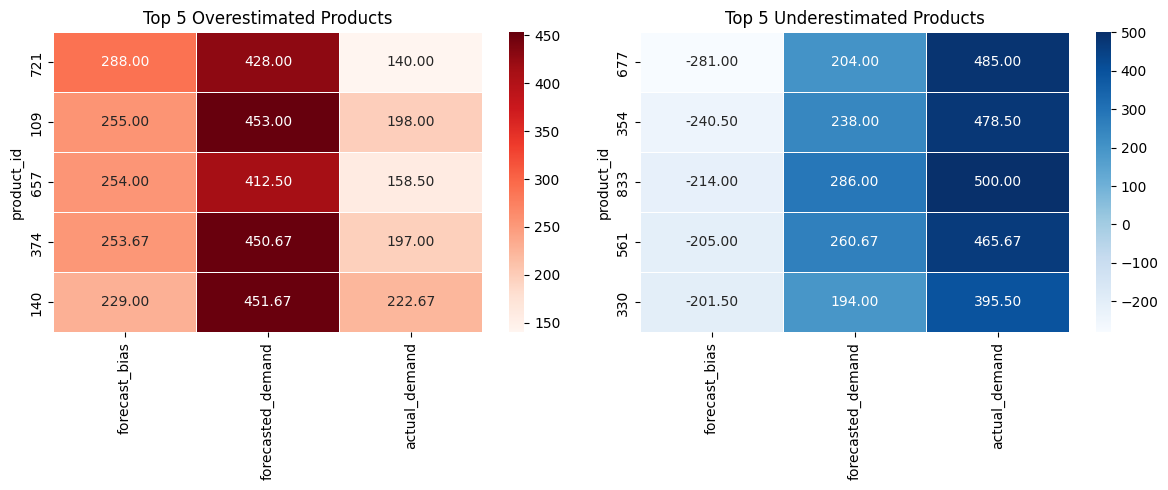

In [30]:
# FORECAST BIAS ANALYSIS

# Group by product_id and calculate metrics
bias_summary = walmart_data.groupby('product_id').agg({
    'forecast_bias': 'mean',
    'forecasted_demand': 'mean',
    'actual_demand': 'mean'
}).reset_index()

# Identify Top 5 Overestimated and Underestimated Products
top_5_overestimated = bias_summary.nlargest(5, 'forecast_bias').set_index('product_id')
top_5_underestimated = bias_summary.nsmallest(5, 'forecast_bias').set_index('product_id')

# Plot Heatmaps
plt.figure(figsize=(12, 5))

# Heatmap for Overestimated Products
plt.subplot(1, 2, 1)
sns.heatmap(top_5_overestimated, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Top 5 Overestimated Products')

# Heatmap for Underestimated Products
plt.subplot(1, 2, 2)
sns.heatmap(top_5_underestimated, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Top 5 Underestimated Products')

plt.tight_layout()
plt.show()


### **2. Weather impact on demand: Analyze how weather conditions influence product sales.**

In [31]:
# Group by weather condition and calculate total quantity sold & revenue
weather_impact = walmart_data.groupby('weather_conditions').agg(
    total_quantity_sold=('quantity_sold', 'sum'),
    total_revenue=('revenue', 'sum'),
    avg_quantity_per_transaction=('quantity_sold', 'mean')
).reset_index()

weather_impact

,weather_conditions,total_quantity_sold,total_revenue,avg_quantity_per_transaction
0,Cloudy,3823,3878416.82,2.984387
1,Rainy,3545,3562222.42,2.910509
2,Stormy,3707,3843358.52,3.006488
3,Sunny,3839,3979603.69,3.027603


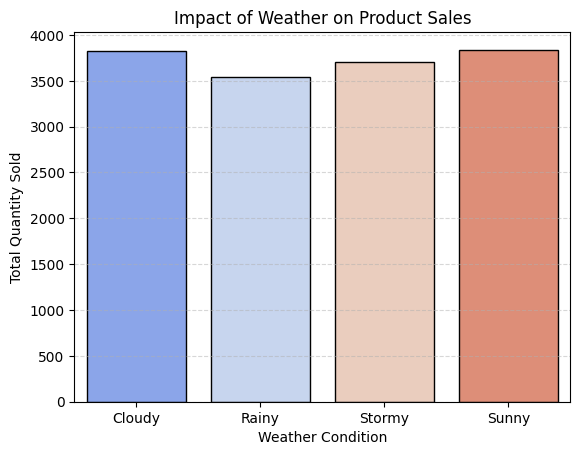

In [32]:
# PLOTTING
# Bar plot for total quantity sold per weather condition
sns.barplot(x='weather_conditions', y='total_quantity_sold', hue='weather_conditions', 
            data=weather_impact, palette='coolwarm', edgecolor='black')

# Labels & title
plt.xlabel('Weather Condition')
plt.ylabel('Total Quantity Sold')
plt.title('Impact of Weather on Product Sales')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()